# Exercise on using unsupervised constructed features for pattern recognition: SOLUTION

To get unsupervised contructed features of an image, we have used a pretrained CNN as feature extractor. For this purpose we pushed each image through a pretrained CNN and extracted the activations in the first fully connected layer. As pretrained CNN we use a VGG16 architecture that was trained on ImageNet data and was the second winner of the ImageNet competition in 2014. 

In this manner we have got unsupervised constructed features for 1000 images of the MNIST data set and 1000 images of the CIFAR10 data set. In both data sets we have 10 distinguished classes. The data sets are balanced meaning we have 100 images per class. To assess if the extracted features are good, we do a PCA and t-SNE visualization and check if we can observe 10 clusters corresponding to the 10 classes. As baseline benchmark we do the PCA and t-SNE with the raw image pixels. Then we also do a PCA and t-SNE with the VGG-features.

a) Go through the code which is used to produce for the MNIST data a 2D PCA and t-SNE plot using the raw pixel features. What differences can you see between both plots? Discuss your observations (e.g. with your neighbor)

**Solution: The 2D PCA plot does not show clear clusters corresponding to the 10 different digits (patterns) in the images. However, we can see some seperation between some of the digits. In the 2D t-SNE we see quite clear clusters corresponding to the 10 digits. However, we can see some overlap between some of the digits. The fact, that the 2D PCA plot looks worse (less separated clusters) then the 2D t-SNE plot, might be caused by the high-dimensional (unknown) structure of the data: With the 2D PCA plot we visualize the projection of the data points onto the plane, that is spanned by the first two principles components. If the data are not close to a 2D plane we loose a lot of information on the true distance of the data points. The 2D t-SNE does not rely on the assumption, that the data are close to a 2D plane and leads in many cases to a superior 2D representation.**

b) Go through the code which is used to produce for the MNIST data a 2D PCA and t-SNE plot using the unsupervised constructed VGG features. Compare the 2D plots we get with raw pixel features and with VGG features and and discuss your observations (e.g. with your neighbor).

**Solution: Also with the VGG features the 2D PCA plot looks much worse than the t-SNE plot. There might be a (very) small improvement of the t-SNE plot when using the VGG features instead of the pixel features.**

c) Go through the code which is used to produce for the CIFAR10 data a 2D plots based on the pixel features.  Complete the code needed to produce a t-SNE plot. Compare the 2D PCA plot and t-SNE plot and discuss your observations (e.g. with your neighbor).

**Solution: For code completionsee below. When using the pixel features of the CIFAR data to produce the 2D plots, we get almost no separation of the 10 patterns - this time not only the 2D PCA plot but also the t-SNE plot looks bad. Apparently it is much more difficult to separate these 10 CIFAR patterns (airplain, ..., truck) then 10 digits!**

d) Go through the code which is used to produce for the CIFAR10 data 2D plots based on the unsupervised constructed VGG features.  Complete the code needed to produce a PCA plot. Compare the 2D PCA plot and t-SNE plot and discuss your observations (e.g. with your neighbor).

**Solution: For code completion see below. The 2D PCA plot with VGG features looks much better than the 2D PCA plot based on the pixel features. However, the 2D t-SNE plot based on VGG features shows a even better separation. Since the 2D t-SNE plot, which we got using the pixel features, was bad, we have some evidence that the unsupervised constructed VGG feature have captured some semantic or more abstract properties of the images. The fact, that the MNIST data were already on the pixel level easy to seperate, is probably due to their simple structure (simple strokes) that do not require complex features to be captured.**

### General imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *


import time
import tensorflow as tf
tf.set_random_seed(1)

import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Keras 2.1.5 TF 1.6.0 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


Using TensorFlow backend.


# MNIST

### Data preparation for MNIST

In [2]:
#downlad mnist data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del [x_test,y_test]

In [3]:
#loop over each class label and sample 100 random images over each label and save the idx to subset
np.random.seed(seed=486)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


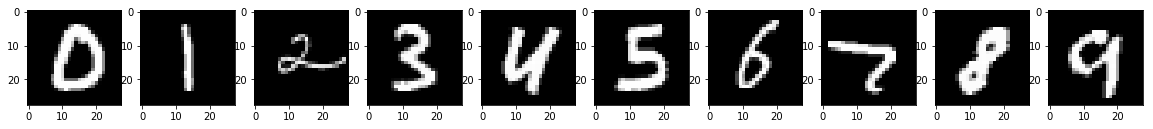

In [5]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd].reshape(1,28,28,1)
    plt.imshow(img[0,:,:,0],cmap="gray")

##  Visualizing MNIST using raw image pixel features

### PCA on pixel values MNIST

In [6]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),28*28)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

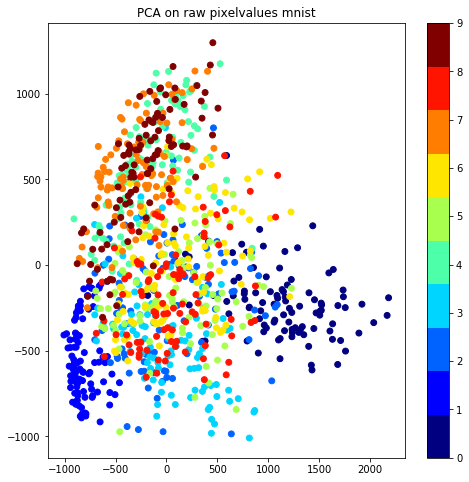

In [7]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),28*28)))[:,0],y=pca.transform(x_train.reshape((len(x_train),28*28)))[:,1],c=y_train,s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues mnist")
plt.colorbar()
plt.show()

### t-sne on pixel values MNIST

In [8]:
# takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),28*28)))

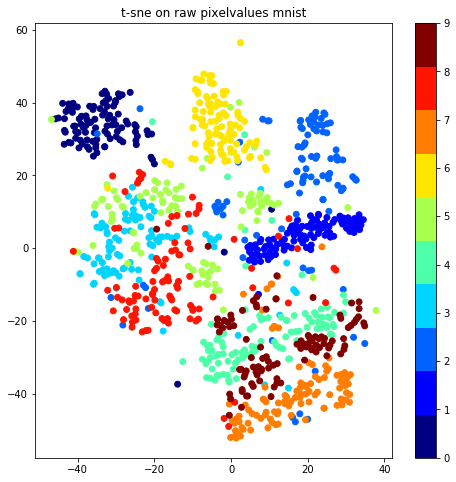

In [9]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues mnist")
plt.colorbar()
plt.show()

##  Visualizing MNIST based on VGG features

### Getting VGG16 features for MNIST

In [10]:
# Downloading embeddings which have been extracted beforehand
import urllib
import os
if not os.path.isfile('Mnist_EMB_1000.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/ejiu7ymoyn6kxp7/Mnist_EMB_1000.npz?dl=1",
    "Mnist_EMB_1000.npz")
%ls -hl Mnist_EMB_1000.npz
Data=np.load("Mnist_EMB_1000.npz")
vgg_features_mnist = Data["arr_0"]

-rw-r--r-- 1 root root 18M Apr  2 20:35 Mnist_EMB_1000.npz


### PCA on vgg16 features on MNIST

In [11]:
pca = PCA(n_components=2)
pca.fit(vgg_features_mnist)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

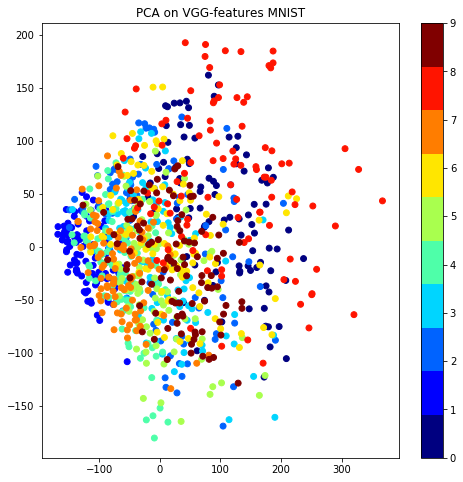

In [12]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(vgg_features_mnist)[:,0],
            y=pca.transform(vgg_features_mnist)[:,1],
            c=y_train,s=35,cmap=cmap)
plt.title("PCA on VGG-features MNIST")
plt.colorbar()
plt.show()

### t-sne on vgg16 features mnist

In [13]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(vgg_features_mnist)

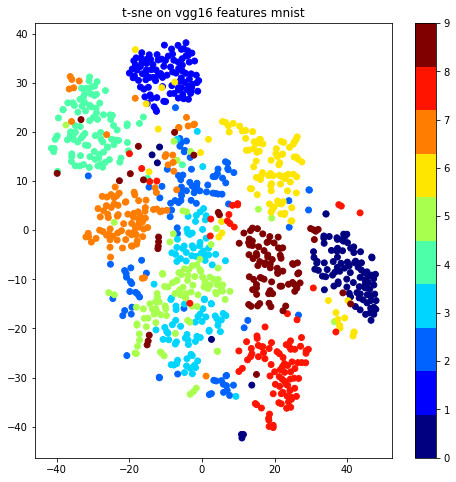

In [14]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,s=35,cmap=cmap)
plt.title("t-sne on vgg16 features mnist")
plt.colorbar()
plt.show()

## Cifar10

### Data preparation

In [15]:
#downlad cifar10 data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
del [x_test,y_test]

In [16]:
#loop over each class label and sample 100 random images over each label and save the idx to subset
np.random.seed(seed=222)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [17]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

In [18]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 32, 32, 3)
(1000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


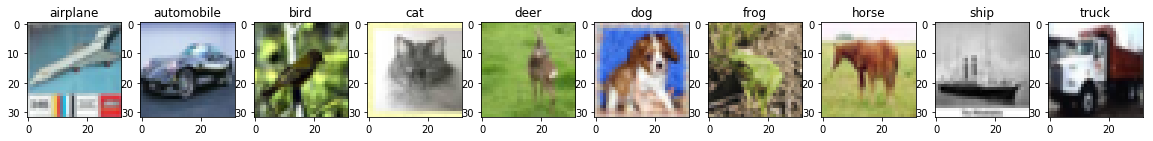

In [19]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

##  Visualizing CIFAR10 based on raw image pixel features

### PCA on pixel values cifar10

In [20]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),32*32*3)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

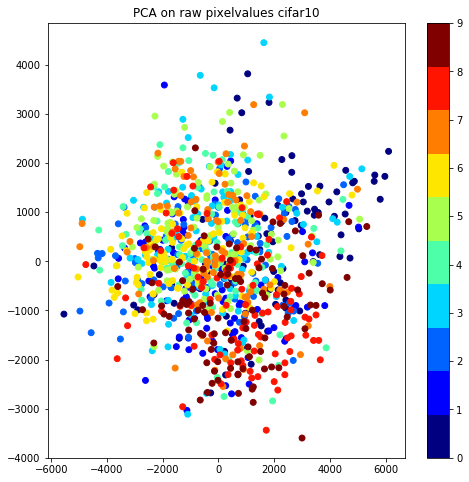

In [21]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,0],
            y=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,1],
            c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

### t-sne on pixel values cifar10

In [22]:
#takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),32*32*3)))

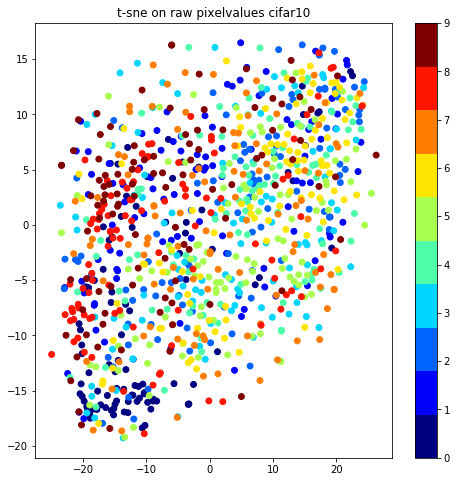

In [23]:
#### doing the t-sne plot
#### your code here:
#########################
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

##  Visualizing CIFAR10 based VGG features

### Getting VGG-features for CIFAR10

In [24]:
# Downloading the data, if it does not exist
import urllib
import os
if not os.path.isfile('cifar_EMB_1000.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/si287al91c1ls0d/cifar_EMB_1000.npz?dl=1",
    "cifar_EMB_1000.npz")
%ls -hl cifar_EMB_1000.npz
Data=np.load("cifar_EMB_1000.npz")
vgg_features_cifar = Data["arr_0"]

-rw-r--r-- 1 root root 18M Apr  2 20:48 cifar_EMB_1000.npz


### PCA on vgg16 features cifar10

In [25]:
pca = PCA(n_components=2)
pca.fit(vgg_features_cifar)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

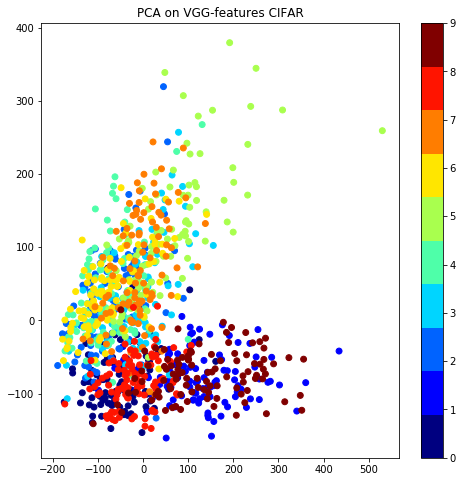

In [26]:
#### doing the PCA plot
#### your code here:
#########################
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(vgg_features_cifar)[:,0],
            y=pca.transform(vgg_features_cifar)[:,1],
            c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("PCA on VGG-features CIFAR")
plt.colorbar()
plt.show()

### t-sne on vgg16 features cifar10

In [27]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(vgg_features_cifar)

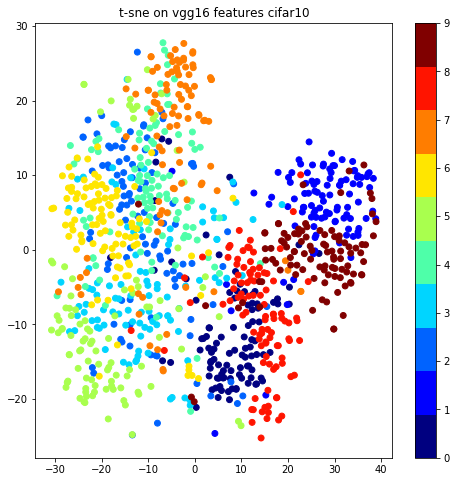

In [28]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("t-sne on vgg16 features cifar10")
plt.colorbar()
plt.show()